# Programa Ejemplo para definir y usar una función de costo personalizada.

## Etapa 1: Carga de los datos.

Antes de comenzar a definir la red neuronal, cargamos la base de datos de interés. Para este ejemplo, usaremos la base de datos MNIST, la cual consiste en identificar dígitos escritos a mano alzada https://keras.io/api/datasets/mnist/. Esta base de datos configura un problema de 10 clases, una clase por cada dígito numérico (0-9).

Se cargan las librerías necesarias

In [1]:
import tensorflow as tf
import matplotlib.pyplot as plt
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from keras.utils import plot_model
from sklearn.model_selection import train_test_split, RandomizedSearchCV

Se carga la base de datos y se divide en los conjunto de entrenamiento y prueba. Hay 60000 imágenes para el entrenamiento y 10000 en el conjunto de prueba.

In [2]:
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.mnist.load_data()

11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 2s 0us/step


Se divide el train en validation

In [3]:
x_train, x_val, y_train, y_val = train_test_split(x_train, y_train, test_size = 0.1)

In [4]:

print(x_train.shape, y_train.shape, x_val.shape, y_val.shape)

(54000, 28, 28) (54000,) (6000, 28, 28) (6000,)


Las imágenes tienen tamaño 28x28. A continuación de muestran algunos ejemplos.


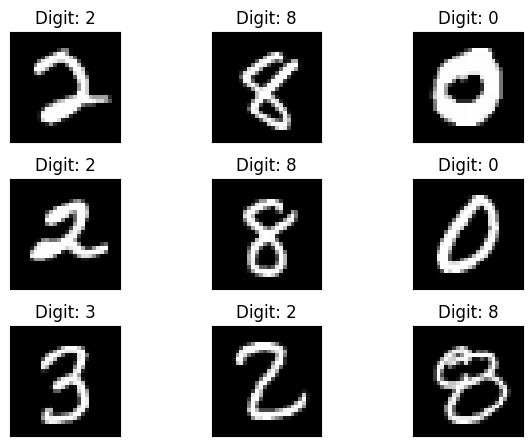

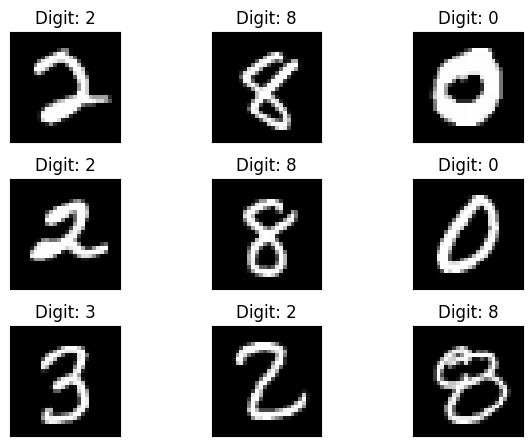

In [5]:
fig = plt.figure()
for i in range(9):
  plt.subplot(3,3,i+1)
  plt.tight_layout()
  plt.imshow(x_train[i], cmap='gray', interpolation='none')
  plt.title("Digit: {}".format(y_train[i]))
  plt.xticks([])
  plt.yticks([])
fig

In [6]:
d1, d2, d3 = x_train.shape
x_train_flat = x_train.reshape((d1, d2*d3))/255
d1, d2, d3 = x_test.shape
x_test_flat = x_test.reshape((d1, d2*d3))/255
d1, d2, d3 = x_val.shape
x_val_flat = x_val.reshape((d1, d2 * d3)) / 255

print(x_train_flat.shape, x_test_flat.shape, x_val_flat.shape)

(54000, 784) (10000, 784) (6000, 784)


# Búsqueda de hiperparámetros a partir de la búsqueda aleatoria

Ejemplo básico donde el número de capas se define de forma manual

Para este ejemplo usaremos la función de costo "Parametric ReLU" (PReLU), la cual está descrita a partir de la siguiente expresión:

$$f(x) = \begin{cases}\alpha x, & x< 0\\ x,& x \ge 0 \end{cases}$$

In [7]:
# Se define la función de costo PReLU, a modo de ejemplo se usa alpha=0.001
@tf.function
def Prelu(x):
  y = tf.where(x>=0, x, 0.001*x)
  return y

In [8]:
# Número de épocas para los experimentos
epochs = 10

Definimos el modelo con los hiperparámetros

In [9]:
model = Sequential()
model.add(Dense(units = 512, input_shape = (784, ), activation = Prelu))
model.add(Dense(units = 256, activation = 'relu'))
model.add(Dense(10, activation = 'softmax'))
optimizer = tf.keras.optimizers.Adam(0.01)
model.compile(loss='sparse_categorical_crossentropy', optimizer = optimizer, metrics = ['accuracy'])

/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [10]:
model.fit(x_train_flat, y_train, epochs=20, batch_size=60000, validation_data= (x_test_flat, y_test))

Epoch 1/20
1/1 ━━━━━━━━━━━━━━━━━━━━ 6s 6s/step - accuracy: 0.0908 - loss: 2.3477 - val_accuracy: 0.2200 - val_loss: 2.4765
Epoch 2/20
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 244ms/step - accuracy: 0.2109 - loss: 2.4692 - val_accuracy: 0.3628 - val_loss: 2.6698
Epoch 3/20
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 302ms/step - accuracy: 0.3611 - loss: 2.6072 - val_accuracy: 0.5347 - val_loss: 2.2947
Epoch 4/20
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 320ms/step - accuracy: 0.5378 - loss: 2.2519 - val_accuracy: 0.5528 - val_loss: 2.1461
Epoch 5/20
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 329ms/step - accuracy: 0.5441 - loss: 2.1301 - val_accuracy: 0.6181 - val_loss: 1.4496
Epoch 6/20
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 326ms/step - accuracy: 0.6105 - loss: 1.4535 - val_accuracy: 0.7657 - val_loss: 0.9900
Epoch 7/20
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 614ms/step - accuracy: 0.7558 - loss: 1.0025 - val_accuracy: 0.7427 - val_loss: 0.8751
Epoch 8/20
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 364ms/step - accuracy: 0.7394 - loss: 0.8856 - val_accuracy: 0.7649 - val_loss: 0.